In [1]:
from m3l.structure import System as sys
import json
#
system = sys()
system.loadSystem('system_Ar.json')
system.convertUnits()
system.save('system_au.json')
#system.convertUnitsInv()
#system.atoms
#system.cell

In [2]:
# definindo o modelo de interação entre os átomos (campo de força)
from m3l.molecular_dynamics import ForceField
class Forces(ForceField):
    def __init__(self):
        super().__init__()
#        self.parameters((125.7/(self.ECONV/self.ACONV**2), 1.0/self.ACONV))
        self.parameters((125.7/self.ECONV, 3.345/self.ACONV, 9.0/self.ACONV))
#
model = Forces()
model()

array([ 0.20040442,  6.32113389, 17.00753512])

In [3]:
from m3l.optimize import Optimize as optim
#
opt = optim(model(), learning_rate = 1.e-2)
system = opt.SD(system)
fmax = 0.0
for atom in system.atoms:
    fmax = max(fmax, (atom[7]**2+atom[8]**2+atom[9]**2)**0.5)
    fmax = fmax*system.ECONV/system.ACONV
#print(fmax)

/tmp/ipykernel_16873/3288824801.py:8: RuntimeWarning: overflow encountered in multiply
  fmax = fmax*system.ECONV/system.ACONV


In [4]:
n_steps = 1000
istep = 0
list_ = []
for i in range(n_steps):
    system = opt.SD(system)
    fmax = 0.0
    for atom in system.atoms:
        fmax = max(fmax, (atom[7]**2+atom[8]**2+atom[9]**2)**0.5)
    if n_steps % 100 == 0:
        istep += 1
        list_.append(fmax*(system.ECONV/system.ACONV))
    #print(f"Step: {i}; fmax = {fmax}")

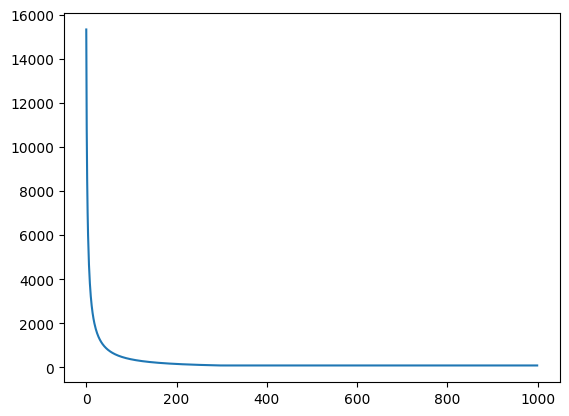

In [5]:
from matplotlib import pyplot as plt
plt.plot(range(istep), list_)

In [6]:
system.convertUnitsInv()
system.save('system_Ar2.json')
system.epotential

np.float64(2652019529168.373)

In [7]:
#abs(system.atoms[0][1]-system.atoms[1][1])